<a href="https://colab.research.google.com/github/M1mirr/food-sales-predictions/blob/main/Copy_of_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Predictions

This project will be a sales prediction for food items sold at various stores.

Our goal of this project is to help the retailer understand the properties of ***products*** and ***outlets*** that play crucial roles in ***increasing sales***.

## **Cleansing Data**

### Mount, Import, Set

In [321]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [322]:
# import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

In [323]:
# loadin your data and create the variable
filename = '/content/drive/MyDrive/Coding Dojo: Data Science/Data/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [324]:
# Check how many rows and columns there. 
df.shape

(8523, 12)

In [325]:
# Return the datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Duplicates, Missing Values, & Inconsistent Categories

**Are there duplicates? If so, drop any duplicates.**

In [326]:
# Check for duplicates
df.duplicated().sum()

0

**Identify missing values.**

In [327]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> * Once identified you will need to determine what to do with this information.
  * Are the missing values pertinent to the information we are researching? 
    * Can we fill in the missing values, do we need to drop the columns, or can we `dropna()`?


Remember we are helping the retialer understand how we can increase sales through the ***products*** and ***outlets***.

---

#### Columns with Missing Values: 

* `Item_Weight`
* `Outlet_Size`

We can drop the `Item_Weight` column since this information doesn't have anything to do with the sale of the product. 

In [328]:
# drop the missing data and run to make sure it is gone. 
df.drop(columns=('Item_Weight'), inplace=True)

With there being multiple Outlet Filters I'm under the assumption that the `Outlet_Location_Type` and `Outlet_Type` provide enough data to corrilate what kind of outlet we are looking at. Under this assumption I'm going to drop the `Outlet_Size` column

In [329]:
df.drop(columns=('Outlet_Size'), inplace=True)

### **Find and fix any inconsistent categories of data**

In [330]:
# We can print all the columns that are an object
dtypes = df.dtypes
str_cols = dtypes[dtypes =='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [331]:
for col in str_cols:
  print(f"- Column= {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    9

## Statistical Analysis

### Graphs Presented :

* [ ] Histogram to view the distributions of various features in your dataset.
* [ ] Boxplot to view statistical summaries of various features in your dataset.
* [ ] Heatmap of the correlation between features.

### Histogram Graph

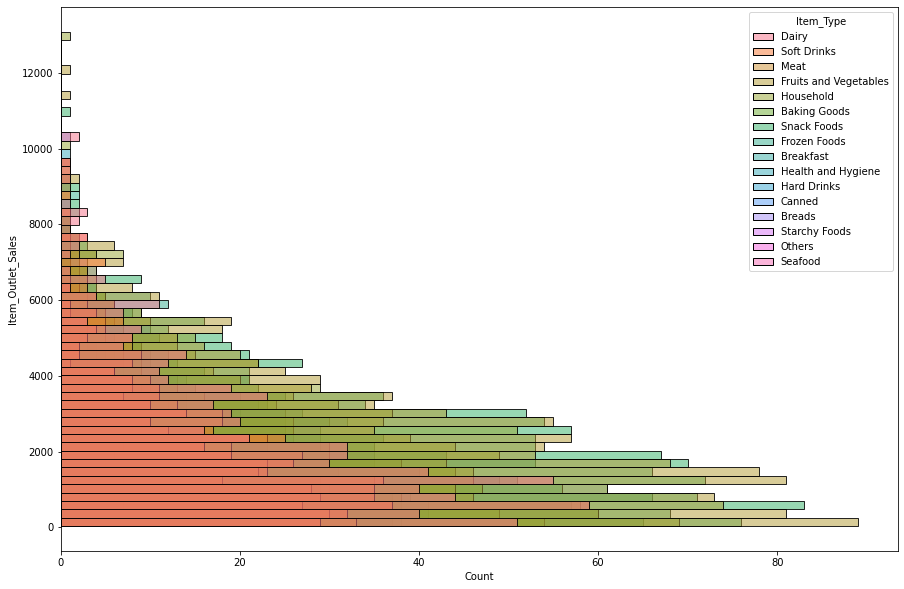

In [317]:
# Hist Graph, representing the sale of the different items sold
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(15,10))
sns.histplot(data=df, y='Item_Outlet_Sales', hue='Item_Type', bins='auto');

### BoxPlot Graph


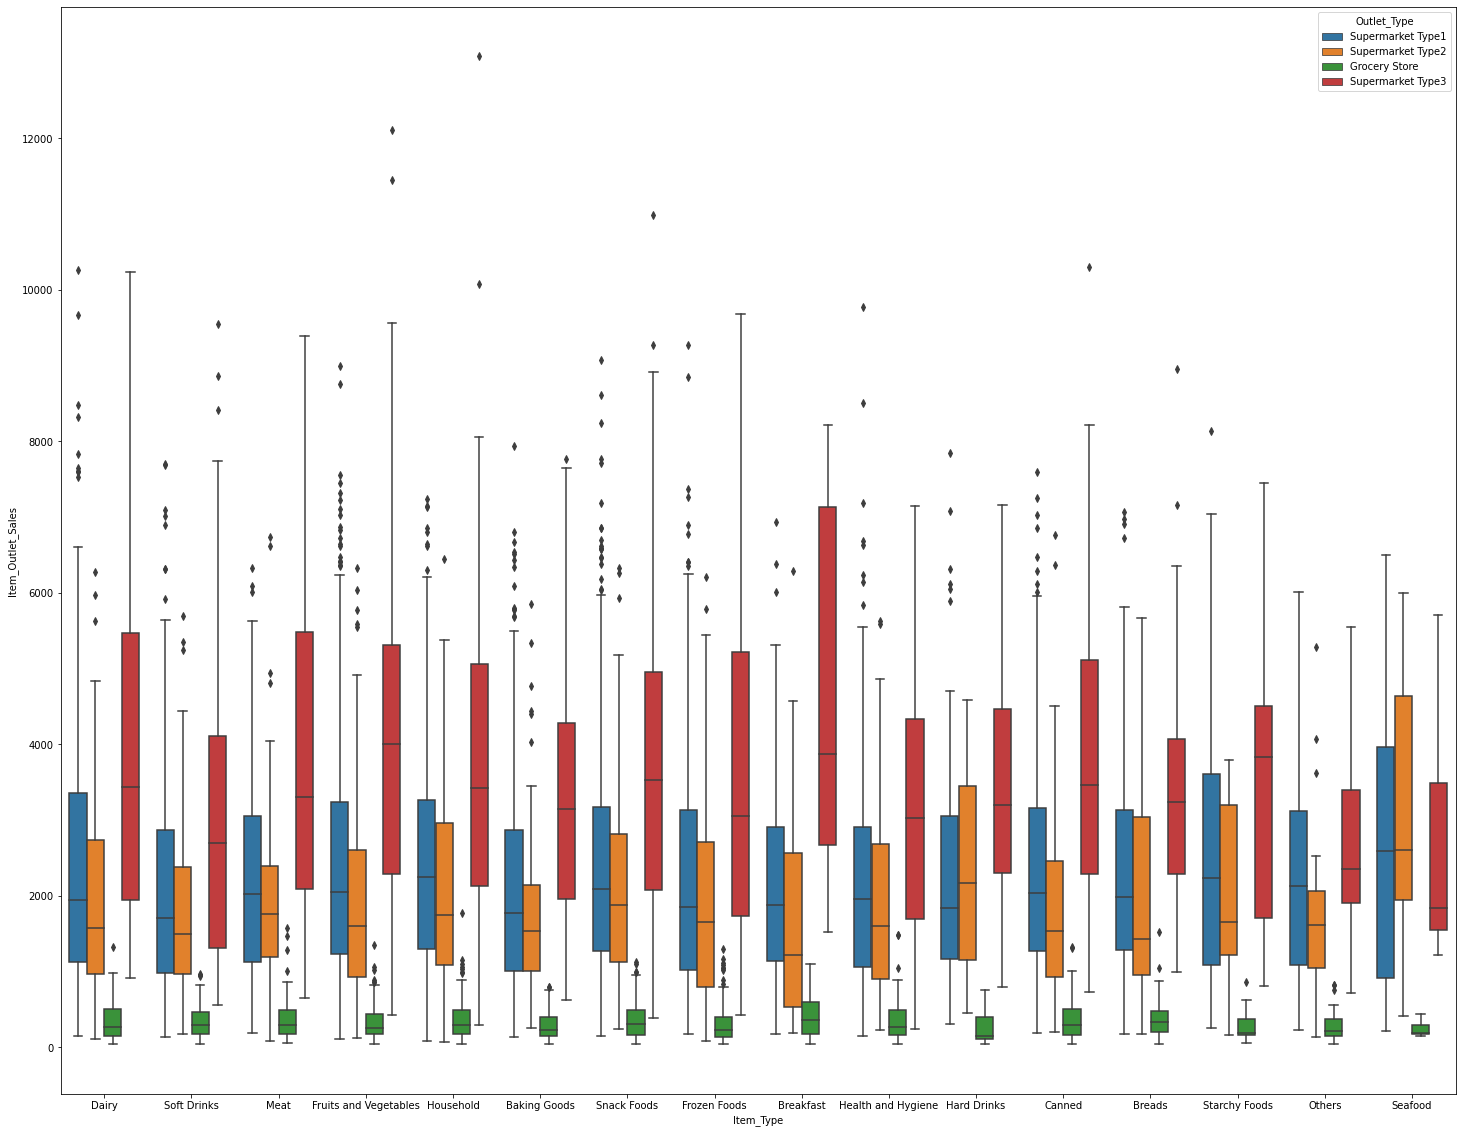

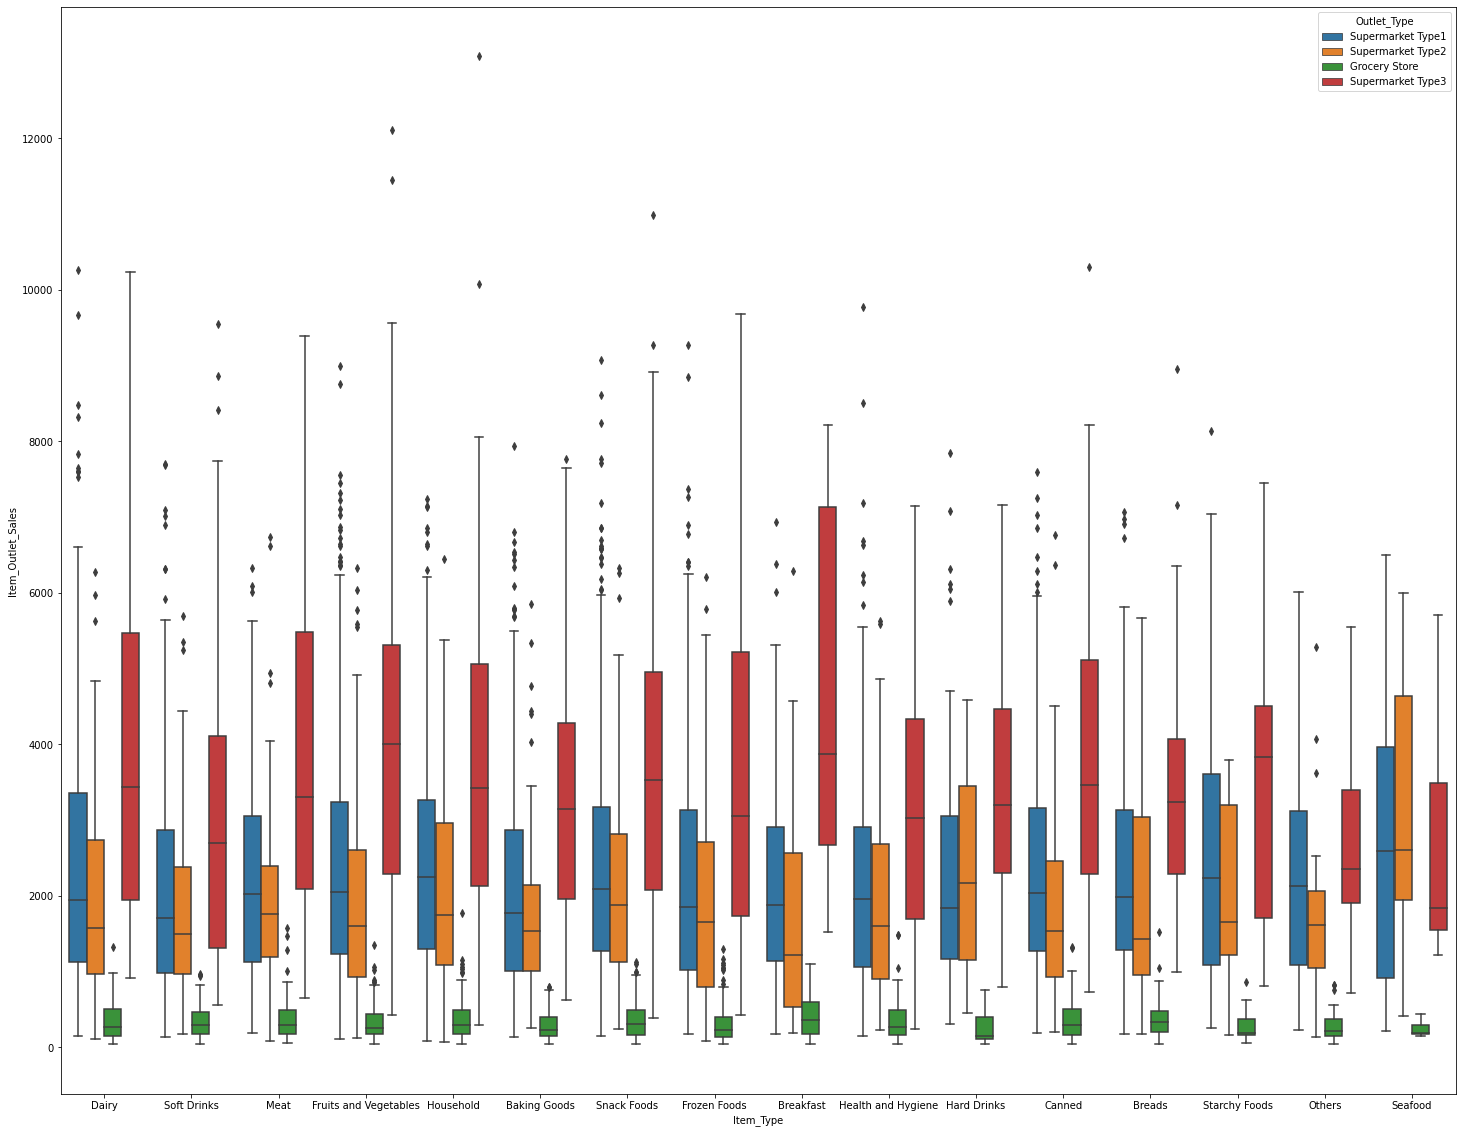

In [332]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize=(25,20))
ax = sns.boxplot(data=df, y='Item_Outlet_Sales', x='Item_Type', hue='Outlet_Type');

### Heatmap

In [333]:
df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
corr = df.corr()
corr

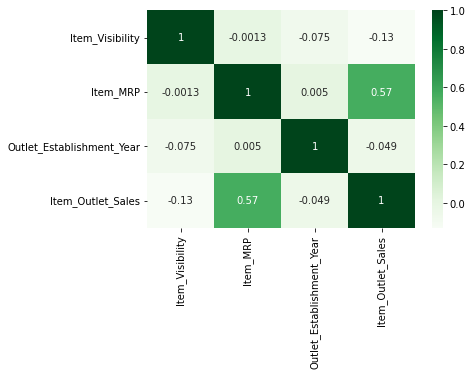

In [341]:
fig, ax = plt.subplots()
ax = sns.heatmap(corr, cmap='Greens', annot=True)